###                                                     ASSIGNMENT 2 DAI

In [43]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

**Loading the data**

In [14]:
data = pd.read_csv("tips.csv")

In [15]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

**Creating feature and Target variables**

In [26]:
# Load the dataset
data = pd.read_csv('tips.csv')  # Replace with your file path

# Split dataset into features (X) and target (y)
X = data.drop('tip', axis=1)
y = data['tip']


In [27]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Label Encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

**Plotting graphs between Variables**

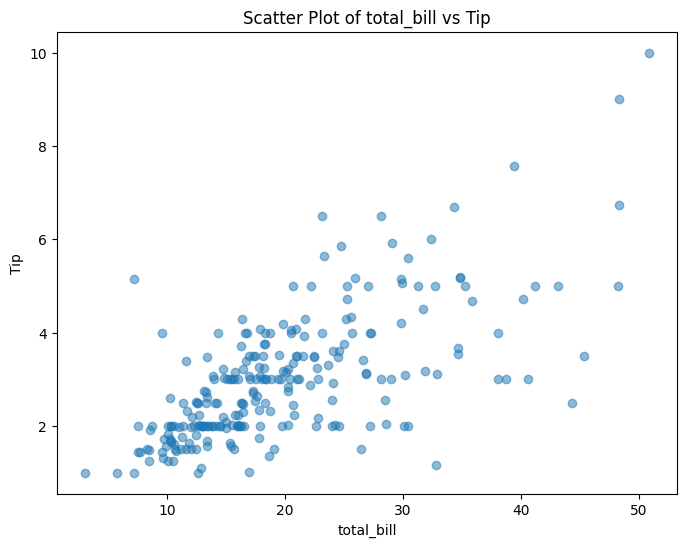

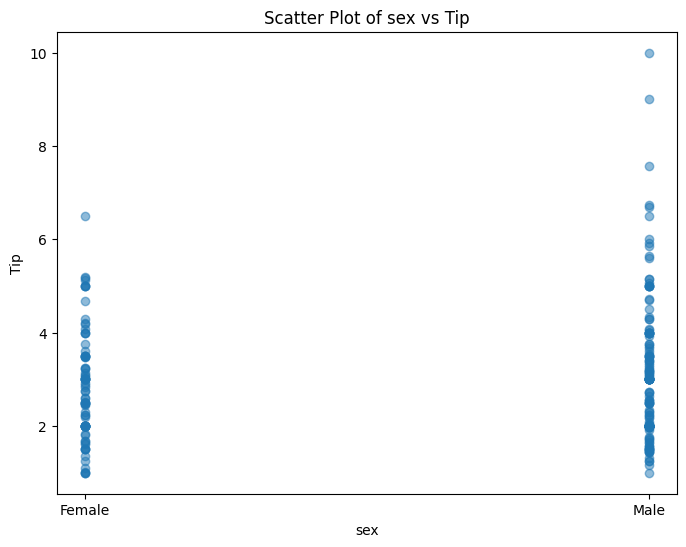

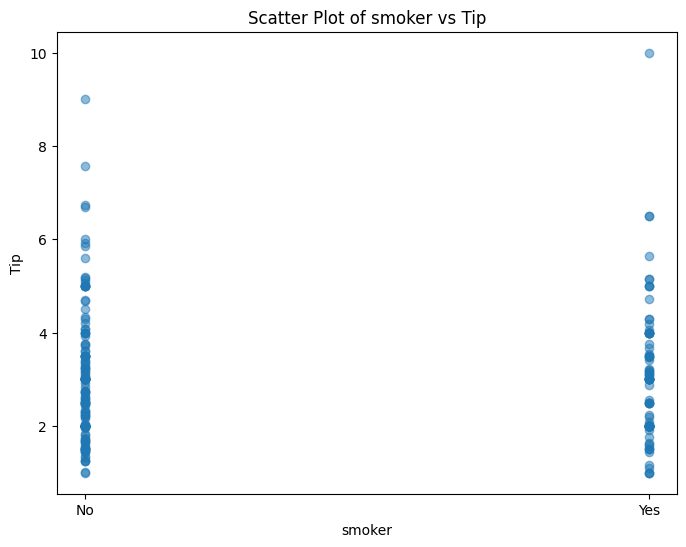

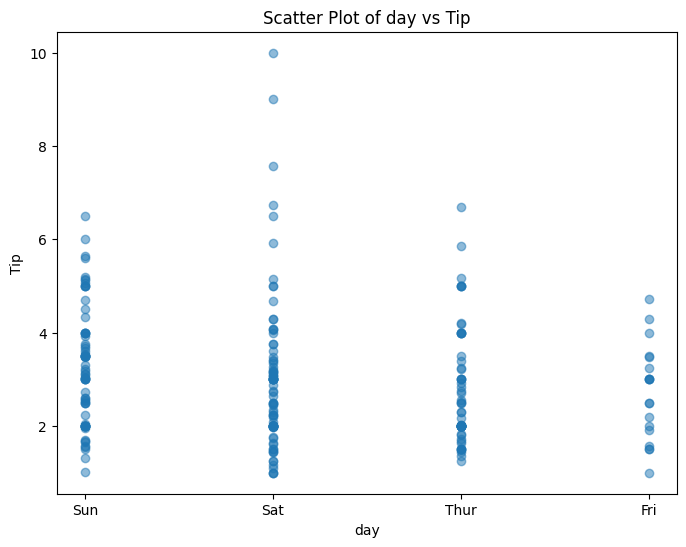

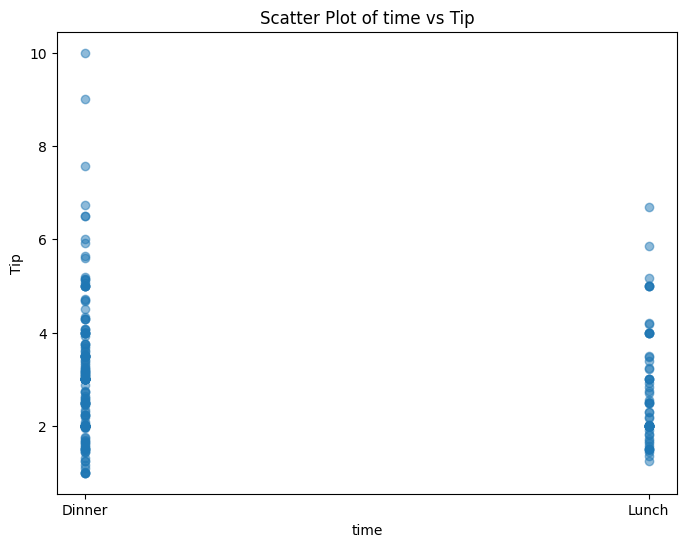

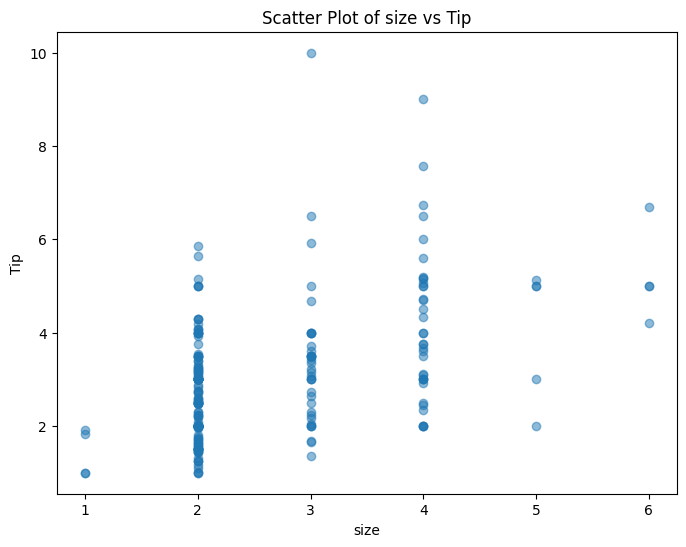

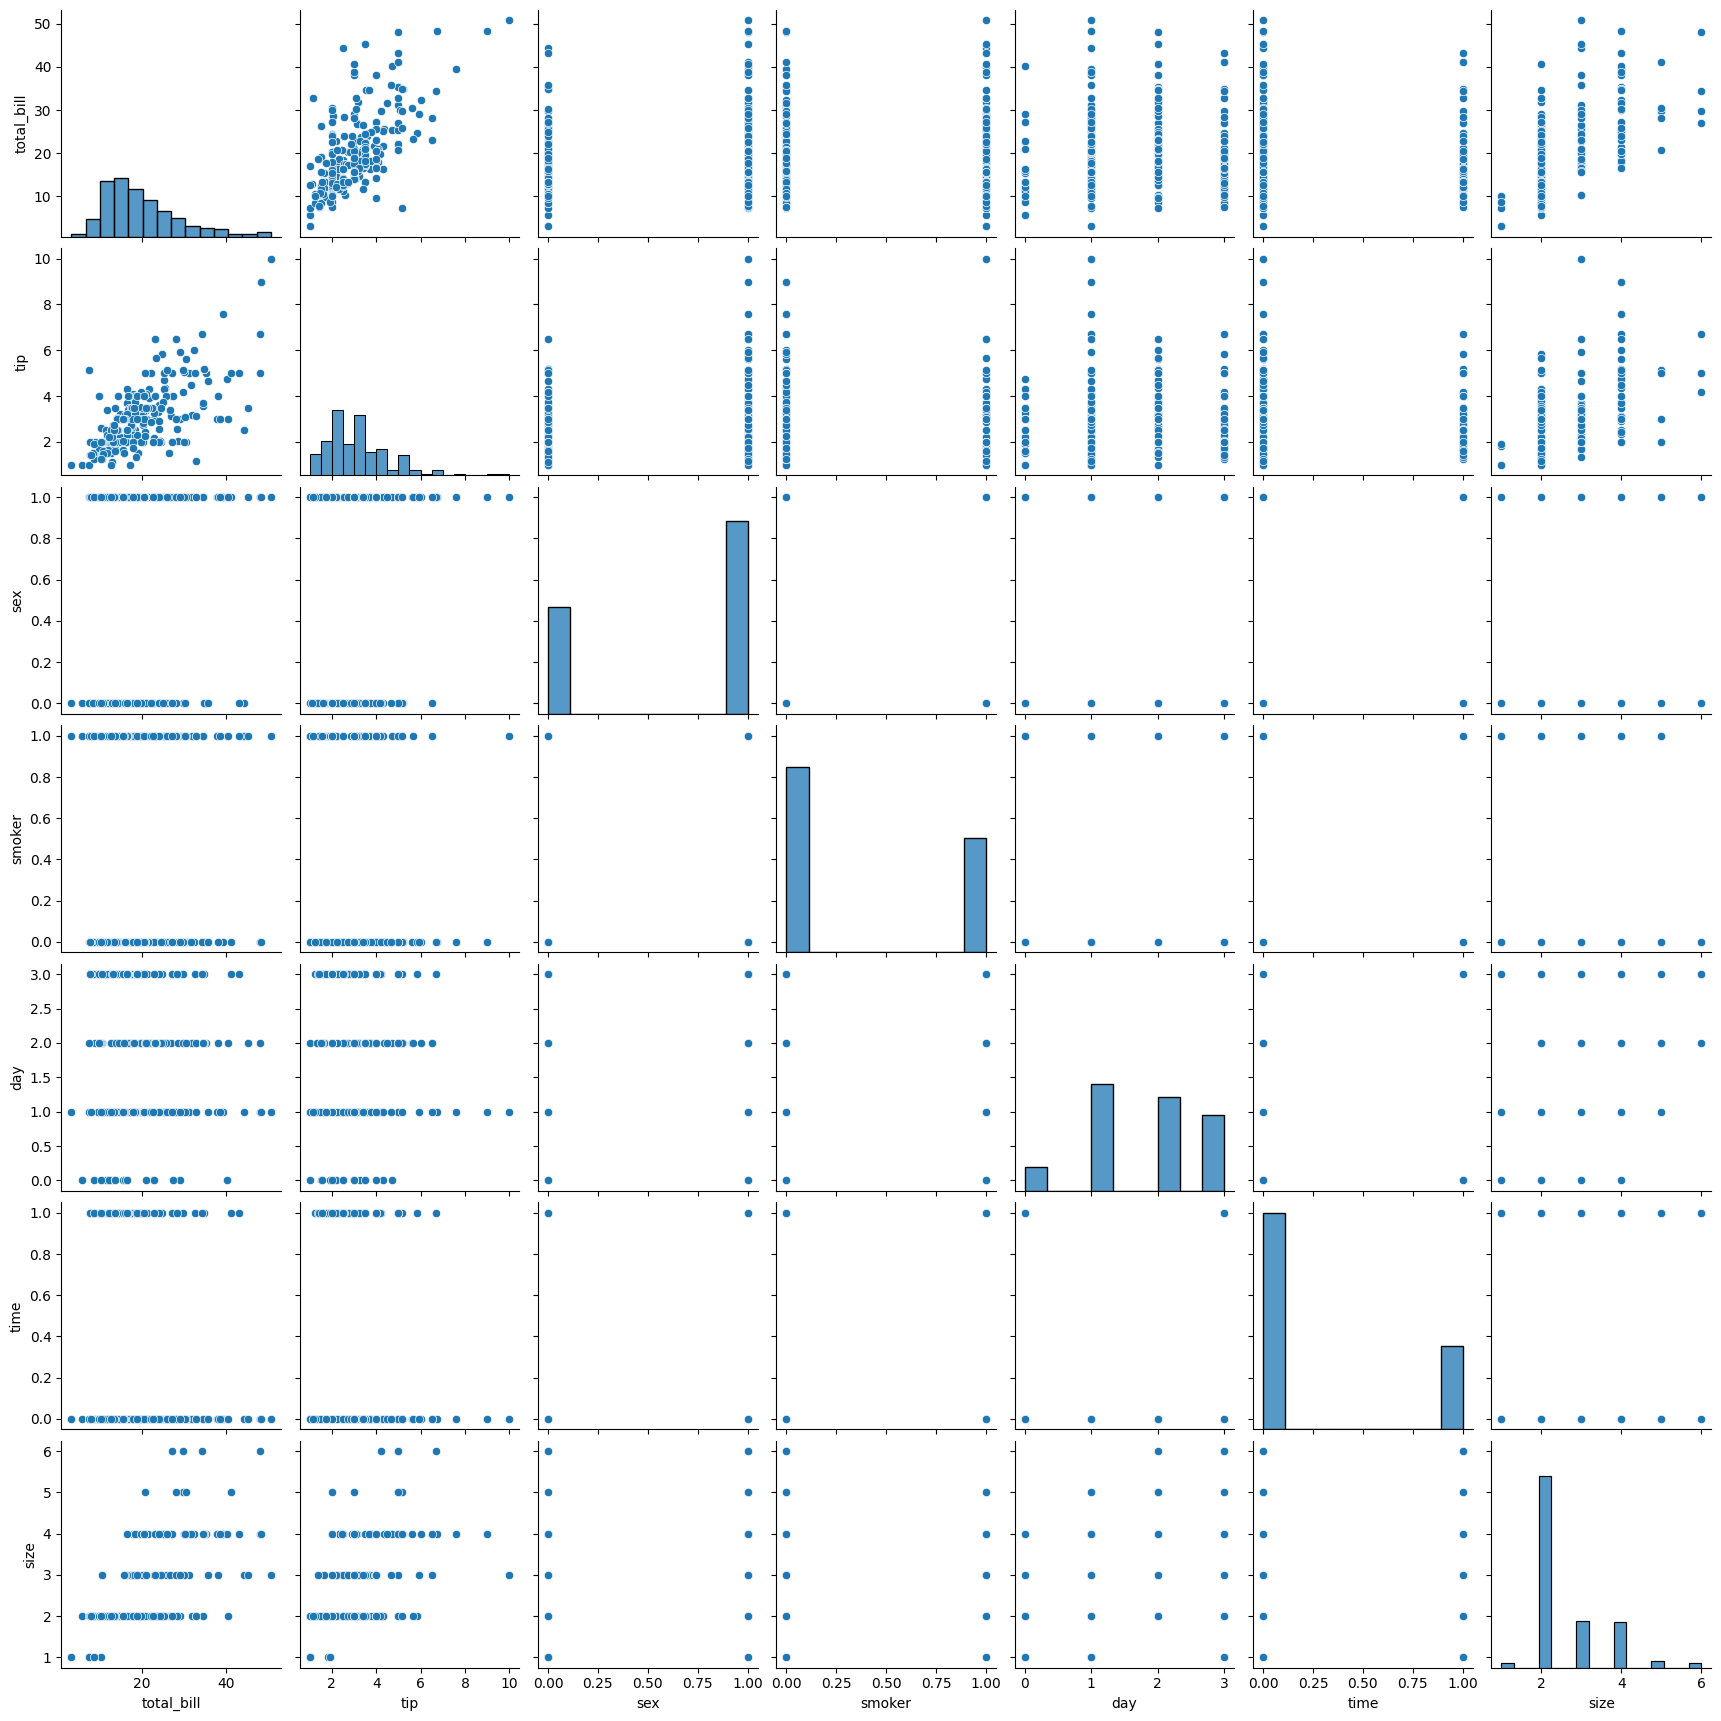

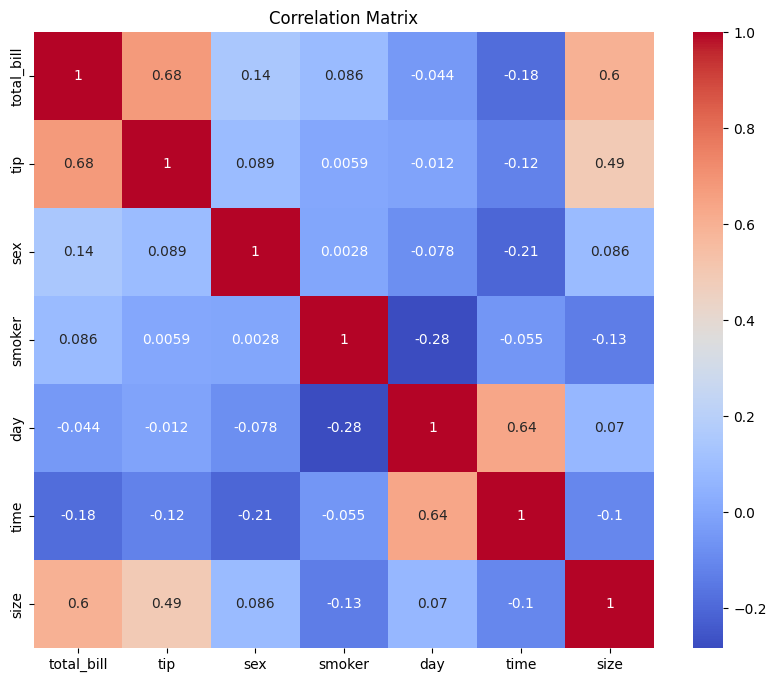

In [35]:
# Scatter plots for each feature vs target
for column in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[column], y, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("Tip")
    plt.title(f"Scatter Plot of {column} vs Tip")
    plt.show()

# Pair Plot
sns.pairplot(data)
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [40]:
import statsmodels.api as sm
# Define independent (X) and dependent (y) variables
X = data.drop(columns=["tip"])
X = sm.add_constant(X)
y = df["tip"]

# Fit the linear regression model
model = sm.OLS(y, X).fit()

**Rainbow Test**

In [41]:
from statsmodels.stats.diagnostic import linear_rainbow

test_stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {test_stat}")
print(f"P-value: {p_value}")

Rainbow Test Statistic: 1.2036274510126599
P-value: 0.15798464222013184


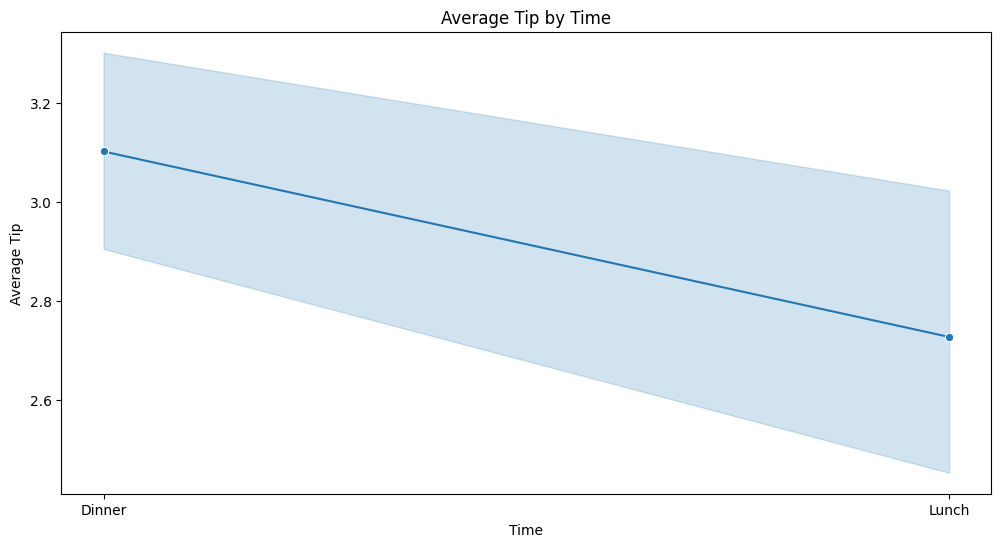

In [44]:
#"Average Tip by Time"
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="time", y="tip", marker="o")
plt.title("Average Tip by Time")
plt.xlabel("Time")
plt.ylabel("Average Tip")
plt.show()

### Model Evaluation on different Models

In [22]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='rbf', C=100),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5)
}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, MSE: {mse}, R^2: {r2}")

    # Cross-Validation Score
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - Cross-Validation Score: {np.mean(cv_scores)}\n")


Linear Regression - MAE: 0.6671331480264893, MSE: 0.7033566017436105, R^2: 0.43730181943482505
Linear Regression - Cross-Validation Score: 0.4214926123925261

Ridge Regression - MAE: 0.6665379965588627, MSE: 0.7007477213216073, R^2: 0.4393889716178486
Ridge Regression - Cross-Validation Score: 0.42329116628453517

Lasso Regression - MAE: 0.6374841046500827, MSE: 0.5908528649971524, R^2: 0.5273068720881755
Lasso Regression - Cross-Validation Score: 0.45664758158245383

Decision Tree - MAE: 0.7426879220552688, MSE: 0.984300883690421, R^2: 0.21254124151494058
Decision Tree - Cross-Validation Score: 0.33738495979611044

Random Forest - MAE: 0.7557163265306125, MSE: 0.9196720148979602, R^2: 0.2642455218065466
Random Forest - Cross-Validation Score: 0.40234345048715825

Support Vector Regression - MAE: 0.6756361115286595, MSE: 0.9782504912511946, R^2: 0.21738166642716605
Support Vector Regression - Cross-Validation Score: 0.43826397013794355

KNN Regression - MAE: 0.718857142857143, MSE: 0.8

Feature Importance from Random Forest Model:
total_bill    0.776476
smoker_Yes    0.066130
size          0.057507
day_Sat       0.029997
day_Sun       0.025592
sex_Male      0.021927
time_Lunch    0.012428
day_Thur      0.009943
dtype: float64


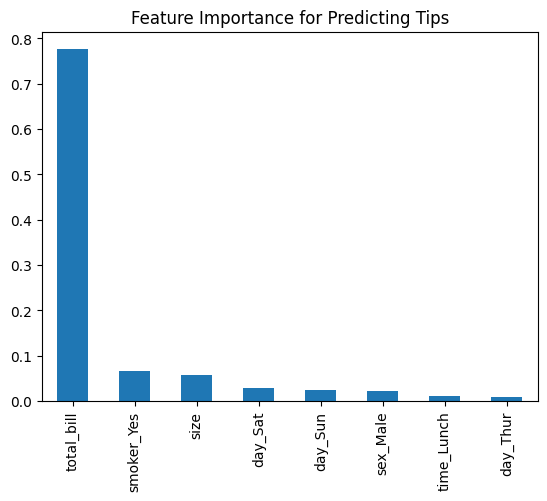

In [23]:
# Feature Importance in Random Forest
best_model = models['Random Forest']
best_model.fit(X, y)
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importance from Random Forest Model:")
print(feature_importances)

# Visualize Feature Importance
feature_importances.plot(kind='bar')
plt.title('Feature Importance for Predicting Tips')
plt.show()


### Residual plots

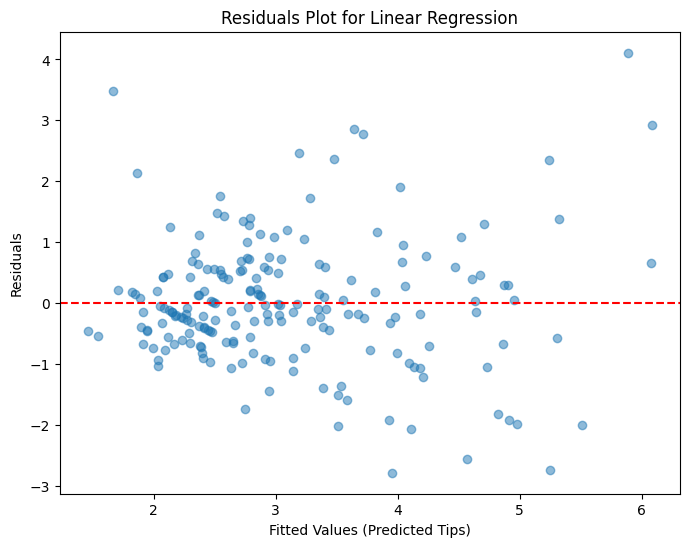

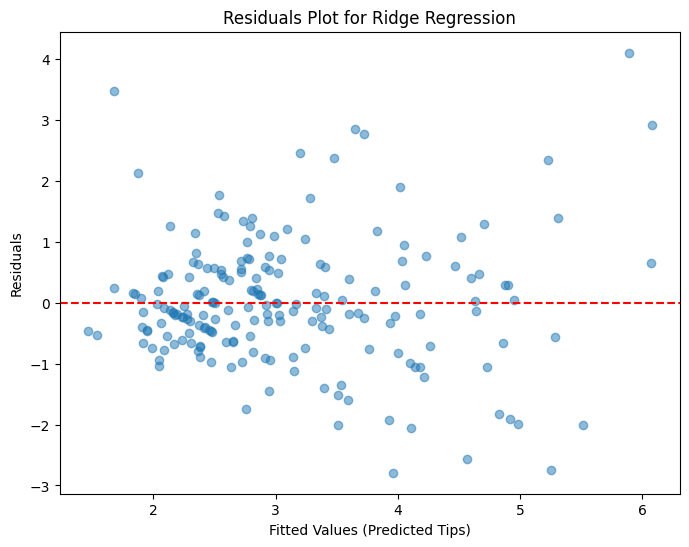

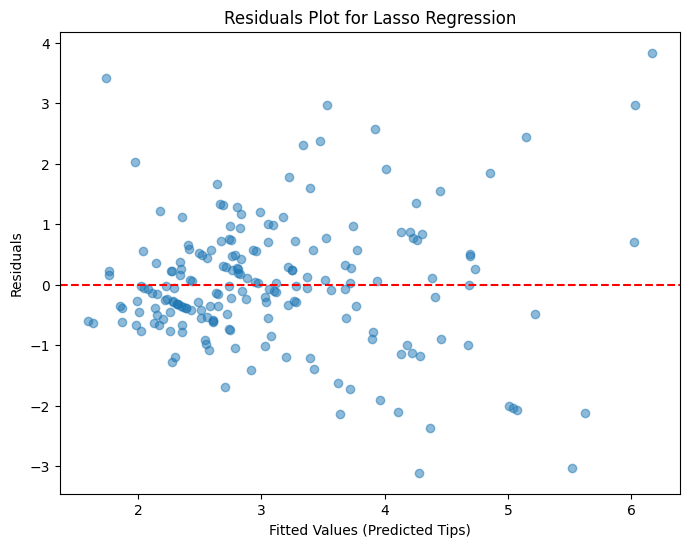

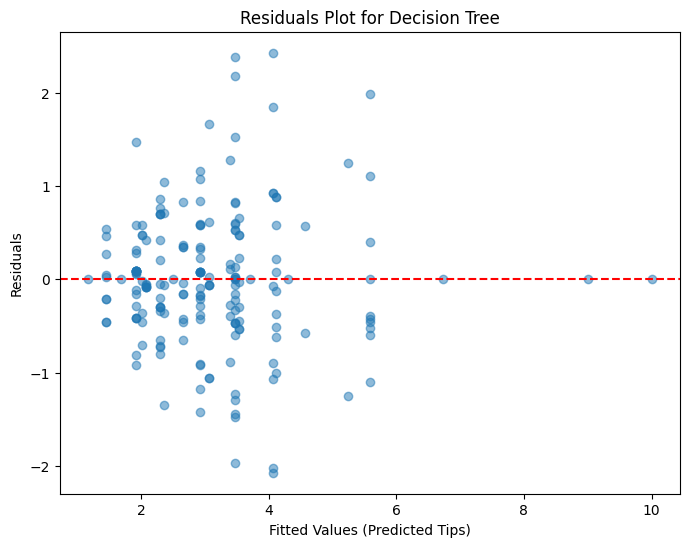

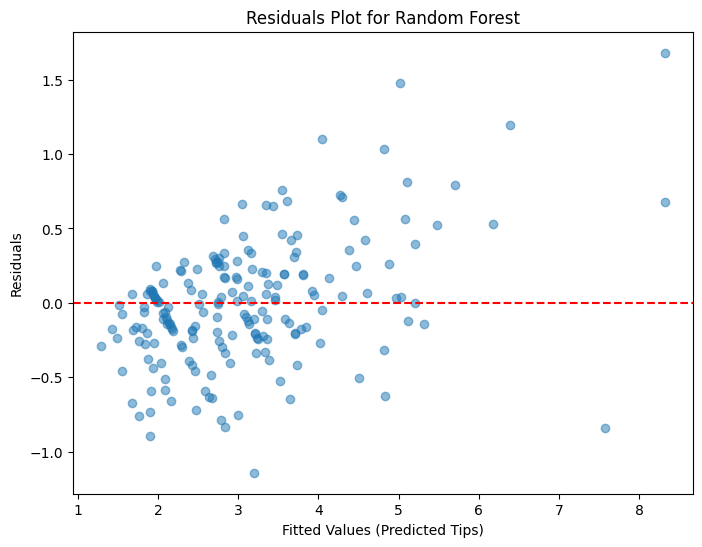

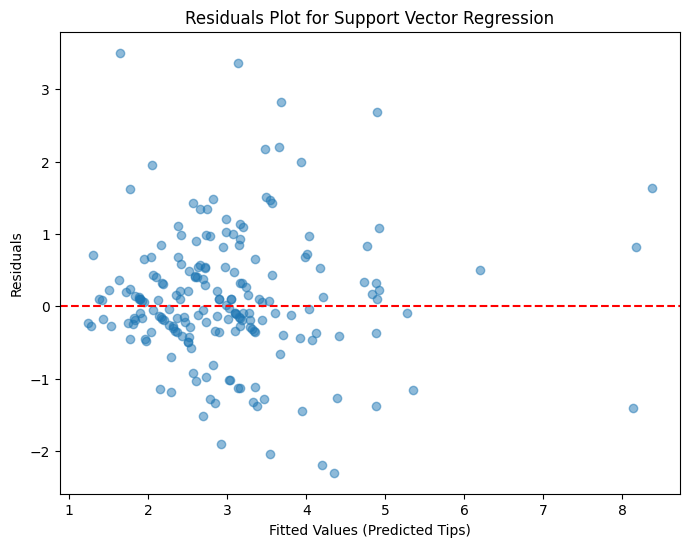

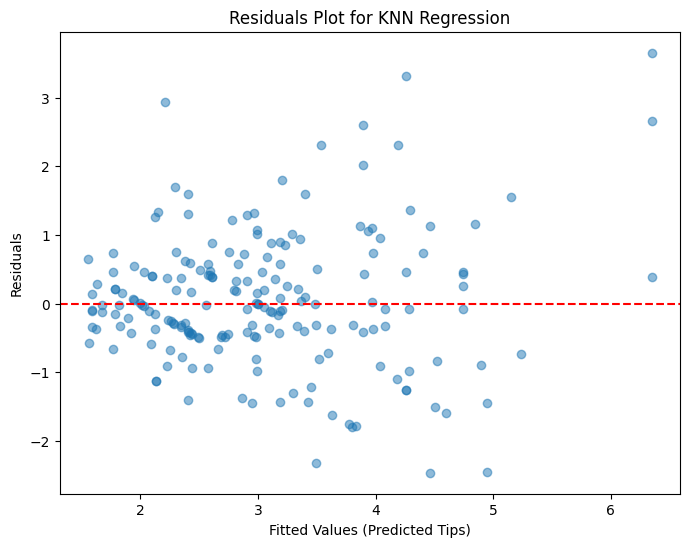

In [25]:
# Loop through each model, fit, and plot residuals
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    residuals = y_train - y_pred_train
    
    # Plot residuals
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred_train, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Fitted Values (Predicted Tips)")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {name}")
    plt.show()


### INSIGHTS:

Tip increaseas as total bill amount increases.ime.

Men generally tip more than what women do.

A smoker and a non-smoker tip the same amount on an average.

More tip is received on Sunday compared to other days.

More tip is received during dinner time compared to lunch time.